In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import tensorflow as tf
import sklearn
import re
import codecs
from tqdm import tqdm
from wordcloud import WordCloud,STOPWORDS

In [ ]:
pd.set_option('display.width', 1000)

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/NLP projects /sarcasm.csv")

In [ ]:
print(df.shape)
df.head()

(55328, 3)


,Unnamed: 0,headline,is_sarcastic
0,0,former versace store clerk sues over secret 'b...,0
1,1,the 'roseanne' revival catches up to our thorn...,0
2,2,mom starting to fear son's web series closest ...,1
3,3,"boehner just wants wife to listen, not come up...",1
4,4,j.k. rowling wishes snape happy birthday in th...,0


In [ ]:
df.rename(columns = {'headline':'text', 'is_sarcastic':'target'}, inplace = True)

In [ ]:
df.head()

,Unnamed: 0,text,target
0,0,former versace store clerk sues over secret 'b...,0
1,1,the 'roseanne' revival catches up to our thorn...,0
2,2,mom starting to fear son's web series closest ...,1
3,3,"boehner just wants wife to listen, not come up...",1
4,4,j.k. rowling wishes snape happy birthday in th...,0


In [ ]:
df.drop('Unnamed: 0',axis = 1,inplace=True)

In [ ]:
df.describe()

,target
count,55328.000000
mean,0.458321
std,0.498264
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
df_preprocess = df.copy()
sarc = df_preprocess.text.copy()

In [ ]:
sarc

0        former versace store clerk sues over secret 'b...
1        the 'roseanne' revival catches up to our thorn...
2        mom starting to fear son's web series closest ...
3        boehner just wants wife to listen, not come up...
4        j.k. rowling wishes snape happy birthday in th...
                               ...                        
55323         jews to celebrate rosh hashasha or something
55324    internal affairs investigator disappointed con...
55325    the most beautiful acceptance speech this week...
55326    mars probe destroyed by orbiting spielberg-gat...
55327                   dad clarifies this not a food stop
Name: text, Length: 55328, dtype: object

In [ ]:
def clean_text (text):
     text = text.lower ()
     text = re.sub (r"[^  sa-zA-Z0-9 @  []]", '', text) # Removes punctuation #removes character for bracket one item
     text = re.sub (r"w *  d +  w *", '', text) # Remove digits
     text = re.sub (' s {2,}', "", text) # Removes unnecessary spaces
     
     return text

In [ ]:
sarc_clean = []
for t in sarc:
    sarc_clean.append(clean_text(t))

In [ ]:
corpus = []
for text in sarc_clean:
    corpus.append(text.replace("'","").replace(",","").replace("[","").replace("]",""))

In [ ]:
corpus

In [ ]:
len(corpus)

55328

In [ ]:
def tokenize(texts):
    tokenizer = nltk.RegexpTokenizer(r'\w+')

    texts_tokens = []
    for i, val in enumerate(texts):
        text_tokens = tokenizer.tokenize(val.lower())

        for i in range(len(text_tokens) - 1, -1, -1): #tokens in reverse order
            if len(text_tokens[i]) < 4:
                del(text_tokens[i])

        texts_tokens.append(text_tokens)
        
    return texts_tokens

In [ ]:
sarc_tokens = tokenize(corpus)
sarc_tokens

[['former',
  'versace',
  'store',
  'clerk',
  'sues',
  'over',
  'secret',
  'black',
  'code',
  'minority',
  'shoppers'],
 ['roseanne',
  'revival',
  'catches',
  'thorny',
  'political',
  'mood',
  'better',
  'worse'],
 ['starting',
  'fear',
  'sons',
  'series',
  'closest',
  'thing',
  'will',
  'have',
  'grandchild'],
 ['boehner',
  'just',
  'wants',
  'wife',
  'listen',
  'come',
  'with',
  'alternative',
  'debt',
  'reduction',
  'ideas'],
 ['rowling', 'wishes', 'snape', 'happy', 'birthday', 'most', 'magical'],
 ['advancing', 'worlds', 'women'],
 ['fascinating', 'case', 'eating', 'grown', 'meat'],
 ['this', 'will', 'send', 'your', 'kids', 'school', 'work', 'company'],
 ['snake', 'handler', 'leaves', 'sinking', 'huckabee', 'campaign'],
 ['fridays', 'morning', 'email', 'inside', 'trumps', 'presser', 'ages'],
 ['airline', 'passengers', 'tackle', 'rushes', 'cockpit', 'bomb', 'threat'],
 ['facebook', 'reportedly', 'working', 'healthcare', 'features', 'apps'],
 ['north

In [ ]:
def removeSW(texts_tokens):
    stopWords = set(stopwords.words('english'))
    texts_filtered = []

    for i, val in enumerate(texts_tokens):
        text_filtered = []
        for w in val:
            if w not in stopWords:
                text_filtered.append(w)
        texts_filtered.append(text_filtered)
        
    return texts_filtered

In [ ]:
Sarc_filtered = removeSW(sarc_tokens)

In [ ]:
Sarc_filtered[4]

['rowling', 'wishes', 'snape', 'happy', 'birthday', 'magical']

In [ ]:
def lemma(texts_filtered):
    wordnet_lemmatizer = WordNetLemmatizer()
    texts_lem = []

    for i, val in enumerate(texts_filtered):
        text_lem = []
        for word in val:
            text_lem.append(wordnet_lemmatizer.lemmatize(word, pos="v")) #verb parts of speech
        texts_lem.append(text_lem)
    
    return texts_lem

In [ ]:
Sarc_lem = lemma(Sarc_filtered)

In [ ]:
Sarc_lem[4]

['rowling', 'wish', 'snape', 'happy', 'birthday', 'magical']

In [ ]:
Sarc_ready = []
for sarcs in Sarc_lem:
    string = ' '
    string = string.join(sarcs)
    Sarc_ready.append(string)

In [ ]:
Sarc_ready

In [ ]:
df_preprocess['Sarcasm'] = Sarc_ready

In [ ]:
df_preprocess.head()

,text,target,Sarcasm
0,former versace store clerk sues over secret 'b...,0,former versace store clerk sue secret black co...
1,the 'roseanne' revival catches up to our thorn...,0,roseanne revival catch thorny political mood b...
2,mom starting to fear son's web series closest ...,1,start fear sons series closest thing grandchild
3,"boehner just wants wife to listen, not come up...",1,boehner want wife listen come alternative debt...
4,j.k. rowling wishes snape happy birthday in th...,0,rowling wish snape happy birthday magical


In [ ]:
old_cols = df_preprocess.columns.values 
new_cols= ['Sarcasm', 'text', 'target']
df_preprocess = df_preprocess.reindex(columns=new_cols)

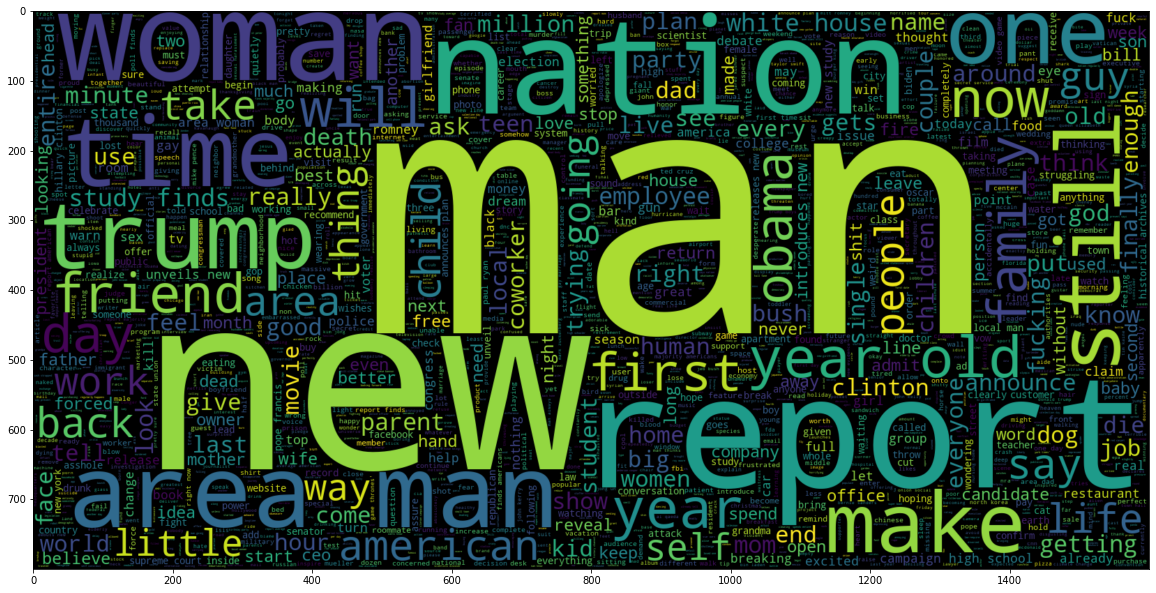

In [ ]:
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.target == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

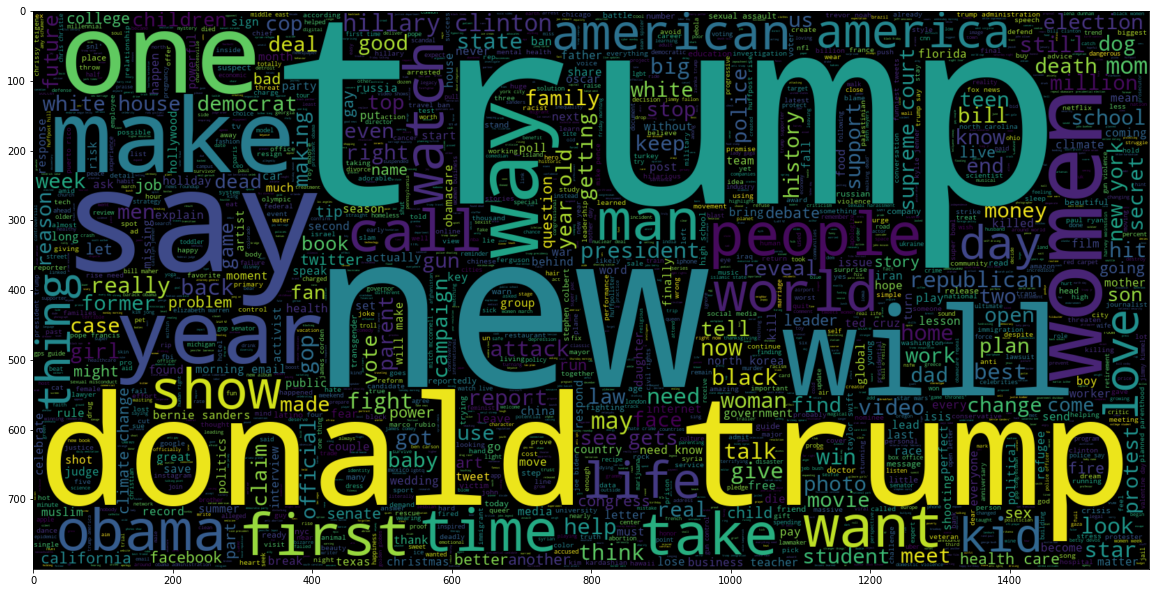

In [ ]:
plt.figure(figsize = (20,20)) # Text that is Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.target == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_preprocess['Sarcasm'], df_preprocess['target'], train_size = 0.6,test_size=0.4, random_state=8)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test, test_size=0.5, random_state=123)
print("Train Data size:", len(X_train))
print("Test Data size", len(X_test))
print("val Data size", len(X_val))

Train Data size: 33196
Test Data size 11066
val Data size 11066


In [ ]:
max_features = 19300
maxlen = 30

In [ ]:
from keras.preprocessing import text, sequence

In [ ]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
tokenized_train = tokenizer.texts_to_sequences(X_train)
X_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [ ]:
tokenized_test = tokenizer.texts_to_sequences(X_test)
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

In [ ]:
tokenized_val = tokenizer.texts_to_sequences(X_val)
X_val = sequence.pad_sequences(tokenized_val, maxlen=maxlen)

In [ ]:
EMBEDDING_FILE = '/content/gdrive/MyDrive/Colab Notebooks/NLP/glove.6B.200d.txt'

In [ ]:
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))

In [ ]:
len(embeddings_index)

400000

In [ ]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
#change below line if computing normal stats is too slow
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


In [ ]:
vocabulary_size = len(tokenizer.word_index)
print("Vocabulary Size :", vocabulary_size)

Vocabulary Size : 19300


In [ ]:
batch_size = 256
epochs = 10
embed_size = 200

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [ ]:
len(embedding_matrix)

19300

In [ ]:
MAX_SEQUENCE_LENGTH = 30

In [ ]:
embedding_layer = tf.keras.layers.Embedding(vocabulary_size,
                                          embed_size,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

In [ ]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout, SpatialDropout1D, GlobalMaxPooling1D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import RNN

*Model training*

## CNN+Bi-LSTM
## stacked Bi-lstm he uniform weight initializer
## GRU
## GRU + BI-LSTM
## Bi-LSTM with glorot uniform weight initializer

In [ ]:
inputs = tf.keras.Input(shape=(MAX_SEQUENCE_LENGTH,), dtype="int32")

x = embedding_layer(inputs)
x = SpatialDropout1D(0.2)(x)  

# Conv1D + LSTM (bidirectional)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)

x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)

outputs = Dense(1, activation="sigmoid")(x)

model_B = tf.keras.Model(inputs, outputs)

In [ ]:
model_B.compile(optimizer=Adam(lr = 0.01), loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model_B.fit(X_train, y_train, batch_size = batch_size , validation_data = (X_val,y_val) , epochs = epochs , callbacks = [learning_rate_reduction])

Epoch 1/10
130/130 [==============================] - 59s 350ms/step - loss: 0.6047 - accuracy: 0.6779 - val_loss: 0.5141 - val_accuracy: 0.7430 - lr: 0.0100
Epoch 2/10
130/130 [==============================] - 44s 338ms/step - loss: 0.5114 - accuracy: 0.7471 - val_loss: 0.4927 - val_accuracy: 0.7586 - lr: 0.0100
Epoch 3/10
130/130 [==============================] - 44s 337ms/step - loss: 0.4646 - accuracy: 0.7794 - val_loss: 0.4696 - val_accuracy: 0.7763 - lr: 0.0100
Epoch 4/10
130/130 [==============================] - 44s 341ms/step - loss: 0.4239 - accuracy: 0.8039 - val_loss: 0.4385 - val_accuracy: 0.7989 - lr: 0.0100
Epoch 5/10
130/130 [==============================] - 44s 340ms/step - loss: 0.3875 - accuracy: 0.8251 - val_loss: 0.4220 - val_accuracy: 0.8040 - lr: 0.0100
Epoch 6/10
130/130 [==============================] - 44s 339ms/step - loss: 0.3640 - accuracy: 0.8405 - val_loss: 0.4144 - val_accuracy: 0.8157 - lr: 0.0100
Epoch 7/10
130/130 [==============================] 

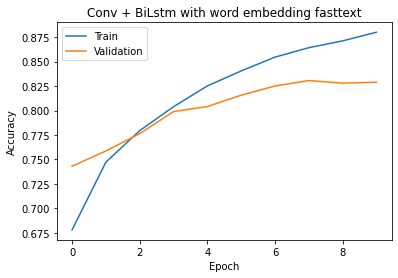

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.title('Conv + BiLstm with word embedding fasttext')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

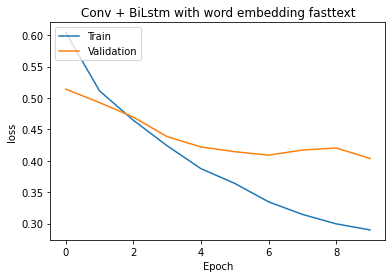

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.title('Conv + BiLstm with word embedding fasttext')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [ ]:
score = model_B.evaluate(X_test, y_test, verbose = 0)

In [ ]:
score

[0.39905744791030884, 0.8307428359985352]

In [ ]:
y_pred = model_B.predict(X_test)

In [ ]:
print('Test loss:', score[0]*100,'%') 
print('Test accuracy:', score[1]*100,'%')

Test loss: 39.905744791030884 %
Test accuracy: 83.07428359985352 %


In [ ]:
def predict_sarc(sent):
  pass

Stacked LSTM

In [ ]:
Inputs = tf.keras.Input(shape=(MAX_SEQUENCE_LENGTH,), dtype="int32")

x = embedding_layer(Inputs)
x = SpatialDropout1D(0.2)(x)

x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2,return_sequences=True))(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2,return_sequences=True))(x)

# Vanilla hidden layer:
x = Dense(512,kernel_initializer='he_uniform',activation='tanh')(x)

x = Dropout(0.5)(x)

Outputs = Dense(1, activation="sigmoid")(x)

model_C = tf.keras.Model(Inputs, Outputs)

In [ ]:
model_C.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_C = model_C.fit(X_train, y_train, batch_size = batch_size , validation_data = (X_val,y_val) , epochs = epochs , callbacks = [learning_rate_reduction])

Epoch 1/10
130/130 [==============================] - 105s 724ms/step - loss: 0.6906 - accuracy: 0.5439 - val_loss: 0.6688 - val_accuracy: 0.5903 - lr: 1.0000e-04
Epoch 2/10
130/130 [==============================] - 92s 708ms/step - loss: 0.6512 - accuracy: 0.6181 - val_loss: 0.6110 - val_accuracy: 0.6634 - lr: 1.0000e-04
Epoch 3/10
130/130 [==============================] - 92s 708ms/step - loss: 0.6167 - accuracy: 0.6618 - val_loss: 0.5857 - val_accuracy: 0.6861 - lr: 1.0000e-04
Epoch 4/10
130/130 [==============================] - 92s 705ms/step - loss: 0.5994 - accuracy: 0.6771 - val_loss: 0.5663 - val_accuracy: 0.7027 - lr: 1.0000e-04
Epoch 5/10
130/130 [==============================] - 91s 698ms/step - loss: 0.5837 - accuracy: 0.6906 - val_loss: 0.5523 - val_accuracy: 0.7154 - lr: 1.0000e-04
Epoch 6/10
130/130 [==============================] - 91s 698ms/step - loss: 0.5731 - accuracy: 0.7011 - val_loss: 0.5473 - val_accuracy: 0.7199 - lr: 1.0000e-04
Epoch 7/10
130/130 [=======

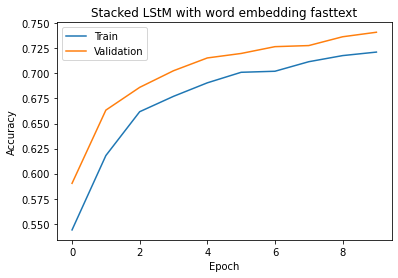

In [ ]:
plt.plot(history_C.history['accuracy'])
plt.plot(history_C.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.title('Stacked LStM with word embedding fasttext')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

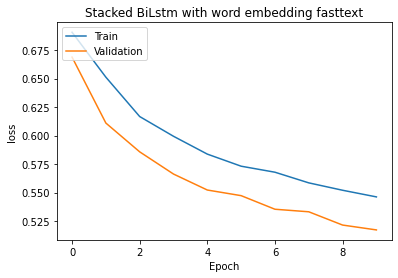

In [ ]:
plt.plot(history_C.history['loss'])
plt.plot(history_C.history['val_loss'])
plt.ylabel('loss')
plt.title('Stacked BiLstm with word embedding fasttext')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [ ]:
score1 = model_C.evaluate(X_val, y_val, verbose = 0) 

In [ ]:
print('Test loss:', score1[0]*100,'%') 
print('Test accuracy:', score1[1]*100,'%')

Test loss: 51.73006057739258 %
Test accuracy: 74.10807013511658 %


Gated Recurrent Unit

In [ ]:
inp = tf.keras.Input(shape=(MAX_SEQUENCE_LENGTH,), dtype="int32")

x = embedding_layer(inp)
x = tf.keras.layers.GRU(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)(x)

x = GlobalMaxPooling1D()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.2)(x)

outp = Dense(1, activation="sigmoid")(x)

model_D = tf.keras.Model(inp, outp)

In [ ]:
model_D.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_D = model_D.fit(X_train, y_train, batch_size = batch_size , validation_data = (X_val,y_val) , epochs = 30 , callbacks = [learning_rate_reduction])

Epoch 1/30
130/130 [==============================] - 25s 172ms/step - loss: 0.6844 - accuracy: 0.5559 - val_loss: 0.6728 - val_accuracy: 0.6144 - lr: 1.0000e-04
Epoch 2/30
130/130 [==============================] - 21s 162ms/step - loss: 0.6593 - accuracy: 0.6203 - val_loss: 0.6399 - val_accuracy: 0.6534 - lr: 1.0000e-04
Epoch 3/30
130/130 [==============================] - 21s 159ms/step - loss: 0.6254 - accuracy: 0.6593 - val_loss: 0.6083 - val_accuracy: 0.6733 - lr: 1.0000e-04
Epoch 4/30
130/130 [==============================] - 22s 166ms/step - loss: 0.5991 - accuracy: 0.6805 - val_loss: 0.5860 - val_accuracy: 0.6901 - lr: 1.0000e-04
Epoch 5/30
130/130 [==============================] - 21s 160ms/step - loss: 0.5811 - accuracy: 0.6954 - val_loss: 0.5704 - val_accuracy: 0.7035 - lr: 1.0000e-04
Epoch 6/30
130/130 [==============================] - 21s 163ms/step - loss: 0.5694 - accuracy: 0.7036 - val_loss: 0.5576 - val_accuracy: 0.7149 - lr: 1.0000e-04
Epoch 7/30
130/130 [========

In [ ]:
score2 = model_D.evaluate(X_test, y_test, verbose = 0) 
score2

[0.34408727288246155, 0.8508946299552917]

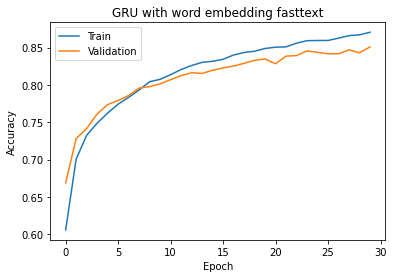

In [ ]:
plt.plot(history_D.history['accuracy'])
plt.plot(history_D.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.title('GRU with word embedding fasttext')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

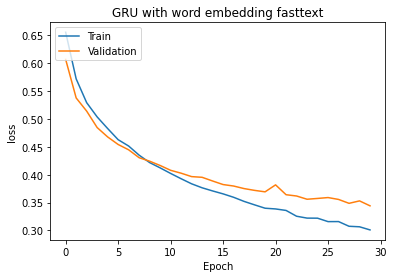

In [ ]:
plt.plot(history_D.history['loss'])
plt.plot(history_D.history['val_loss'])
plt.ylabel('loss')
plt.title('GRU with word embedding fasttext')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

GRU + BI-LSTM

In [ ]:
IN = tf.keras.Input(shape=(MAX_SEQUENCE_LENGTH,), dtype="int32")

x = embedding_layer(IN)
x = tf.keras.layers.GRU(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)(x)

x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.2)(x)

OUT = Dense(1, activation="sigmoid")(x)

model_E = tf.keras.Model(IN, OUT)

In [ ]:
model_E.compile(optimizer=Adam(), loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_E = model_E.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=25,
                    validation_data=(X_test, y_test), callbacks=[es, reduce_lr])

Epoch 1/25
44/44 [==============================] - 43s 834ms/step - loss: 0.6285 - accuracy: 0.6402 - val_loss: 0.5679 - val_accuracy: 0.6982
Epoch 2/25
44/44 [==============================] - 35s 806ms/step - loss: 0.5606 - accuracy: 0.7111 - val_loss: 0.5516 - val_accuracy: 0.7135
Epoch 3/25
44/44 [==============================] - 36s 813ms/step - loss: 0.5374 - accuracy: 0.7257 - val_loss: 0.5172 - val_accuracy: 0.7406
Epoch 4/25
44/44 [==============================] - 35s 806ms/step - loss: 0.5183 - accuracy: 0.7407 - val_loss: 0.5095 - val_accuracy: 0.7452
Epoch 5/25
44/44 [==============================] - 36s 808ms/step - loss: 0.5030 - accuracy: 0.7500 - val_loss: 0.4852 - val_accuracy: 0.7571
Epoch 6/25
44/44 [==============================] - 35s 804ms/step - loss: 0.4867 - accuracy: 0.7619 - val_loss: 0.4705 - val_accuracy: 0.7708
Epoch 7/25
44/44 [==============================] - 36s 811ms/step - loss: 0.4672 - accuracy: 0.7755 - val_loss: 0.4625 - val_accuracy: 0.7788

In [ ]:
score3 = model_E.evaluate(X_test, y_test, verbose = 0) 
score3

[0.35633203387260437, 0.8379721641540527]

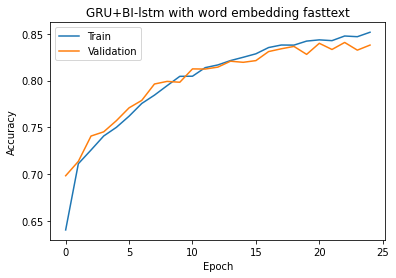

In [ ]:
plt.plot(history_E.history['accuracy'])
plt.plot(history_E.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.title('GRU+BI-lstm with word embedding fasttext')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

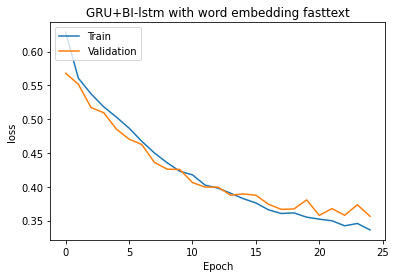

In [ ]:
plt.plot(history_E.history['loss'])
plt.plot(history_E.history['val_loss'])
plt.ylabel('loss')
plt.title('GRU+BI-lstm with word embedding fasttext')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [ ]:
inner = tf.keras.Input(shape=(MAX_SEQUENCE_LENGTH,), dtype="int32")

x = embedding_layer(inner)
x = SpatialDropout1D(0.2)(x)  

# Conv1D + LSTM (bidirectional)
x = Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2))(x)

x = Dense(512, kernel_initializer = 'glorot_uniform',activation="relu")(x)
x = Dropout(0.5)(x)

outer = Dense(1, activation="sigmoid")(x)

model_F = tf.keras.Model(inner, outer)

In [ ]:
model_F.compile(optimizer=Adam(), loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_F = model_F.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=25,
                    validation_data=(X_val, y_val), callbacks=[es, reduce_lr])

Epoch 1/25
44/44 [==============================] - 85s 2s/step - loss: 0.6184 - accuracy: 0.6485 - val_loss: 0.5555 - val_accuracy: 0.7052
Epoch 2/25
44/44 [==============================] - 80s 2s/step - loss: 0.5585 - accuracy: 0.7077 - val_loss: 0.5233 - val_accuracy: 0.7335
Epoch 3/25
44/44 [==============================] - 80s 2s/step - loss: 0.5300 - accuracy: 0.7298 - val_loss: 0.4961 - val_accuracy: 0.7543
Epoch 4/25
44/44 [==============================] - 80s 2s/step - loss: 0.5024 - accuracy: 0.7496 - val_loss: 0.4693 - val_accuracy: 0.7754
Epoch 5/25
44/44 [==============================] - 80s 2s/step - loss: 0.4675 - accuracy: 0.7729 - val_loss: 0.4350 - val_accuracy: 0.7932
Epoch 6/25
44/44 [==============================] - 80s 2s/step - loss: 0.4429 - accuracy: 0.7894 - val_loss: 0.4124 - val_accuracy: 0.8094
Epoch 7/25
44/44 [==============================] - 80s 2s/step - loss: 0.4134 - accuracy: 0.8081 - val_loss: 0.3990 - val_accuracy: 0.8158
Epoch 8/25
44/44 [==

In [ ]:
score4 = model_F.evaluate(X_test, y_test, verbose = 0) 
score4

[0.22935763001441956, 0.9126152396202087]

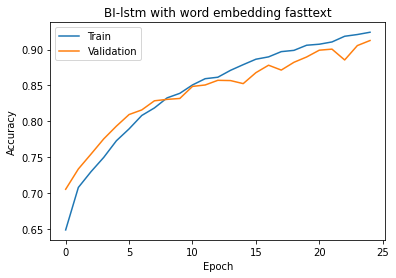

In [ ]:
plt.plot(history_F.history['accuracy'])
plt.plot(history_F.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.title('BI-lstm with word embedding fasttext')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

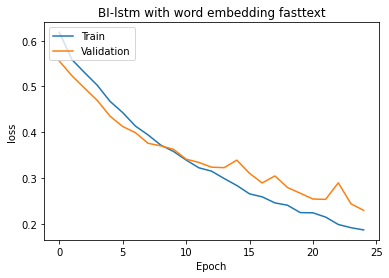

In [ ]:
plt.plot(history_F.history['loss'])
plt.plot(history_F.history['val_loss'])
plt.ylabel('loss')
plt.title('BI-lstm with word embedding fasttext')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')